# Recreating Zwift ride powerplot

## Import .fit file and convert to pandas dataframe

The code for importing .fit files and converting to a pandas dataframe is from http://johannesjacob.com/analyze-your-cycling-data-python/.
To install the python packages, type 'pip install pandas numpy fitparse matplotlib tqdm' on the command line.


In [1]:
import os
import datetime
from fitparse import FitFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
filename = input("Type filename, including .fit extension:  ")
# 2021-10-05-10-54-32.fit
# Race_day_2_Giro_Della_Donna_video_up_.fit

fitfile = FitFile(filename)

Type filename, including .fit extension:  Race_day_2_Giro_Della_Donna_video_up_.fit


From Johannes Jacob's blog post:  
_"Now we are ready to import the workout file and transform the data into a 
pandas dataframe. Unfortunately we have to use an ugly hack with this "while" 
loop to avoid timing issues. Then we are looping through the file, append 
the records to a list and convert the list to a pandas dataframe."_

In [3]:
while True:
    try:
        fitfile.messages
        break
    except KeyError:
        continue
workout = []
for record in fitfile.get_messages('record'):
    r = {}
    for record_data in record:
        r[record_data.name] = record_data.value
    workout.append(r)
df = pd.DataFrame(workout)

In [4]:
df

,altitude,distance,enhanced_altitude,enhanced_speed,gps_accuracy,position_lat,position_long,speed,timestamp,ascent,...,calories,grade,power,left_pedal_smoothness,left_torque_effectiveness,right_pedal_smoothness,right_torque_effectiveness,left_right_balance,temperature,heart_rate
0,129.6,2.87,129.6,4.395,2,-450441014,1734201494,4.395,2021-03-27 19:53:10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130.0,5.75,130.0,4.466,2,-450440721,1734201370,4.466,2021-03-27 19:53:11,0.0,...,0.0,2.46,204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,130.2,8.70,130.2,4.520,2,-450440419,1734201244,4.520,2021-03-27 19:53:12,0.0,...,0.0,2.74,215.0,26.0,83.0,23.5,86.5,NaN,NaN,NaN
3,130.4,13.09,130.4,4.264,2,-450439969,1734201064,4.264,2021-03-27 19:53:13,0.0,...,0.0,3.11,225.0,25.5,84.0,25.0,85.5,NaN,NaN,NaN
4,130.6,17.36,130.6,4.234,2,-450439517,1734200875,4.234,2021-03-27 19:53:14,1.0,...,0.0,3.54,224.0,25.0,84.5,26.5,85.0,50.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47502,68.4,255175.30,68.4,0.000,2,-450419371,1728944174,0.000,2021-03-28 09:04:52,3595.0,...,5720.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,14.0,117.0
47503,68.4,255175.30,68.4,0.000,2,-450419371,1728944174,0.000,2021-03-28 09:04:53,3595.0,...,5720.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,14.0,117.0
47504,68.4,255175.30,68.4,0.000,2,-450419371,1728944174,0.000,2021-03-28 09:04:54,3595.0,...,5720.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,14.0,118.0
47505,68.4,255175.30,68.4,0.000,1,-450419371,1728944174,0.000,2021-03-28 09:04:55,3595.0,...,5720.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,14.0,119.0


In [5]:
df.tail(1)

,altitude,distance,enhanced_altitude,enhanced_speed,gps_accuracy,position_lat,position_long,speed,timestamp,ascent,...,calories,grade,power,left_pedal_smoothness,left_torque_effectiveness,right_pedal_smoothness,right_torque_effectiveness,left_right_balance,temperature,heart_rate
47506,68.4,255175.3,68.4,0.0,1,-450419371,1728944174,0.0,2021-03-28 09:04:56,3595.0,...,5720.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,14.0,119.0


## Get date of workout from column 'timestamp' 

In [6]:
timestamp = df['timestamp'].tail(1).values
timestamp

array(['2021-03-28T09:04:56.000000000'], dtype='datetime64[ns]')

In [7]:
date = np.datetime_as_string(timestamp, unit='D')
date

array(['2021-03-28'], dtype='<U28')

In [8]:
date_str = str(date)
type(date_str)
print(date_str)


['2021-03-28']


In [9]:
date_str = date_str.strip("[")
date_str = date_str.strip("]")
date_str = date_str.strip("'")
print(date_str)

2021-03-28


##  Remove unnecessary columns

In [10]:
df.columns

Index(['altitude', 'distance', 'enhanced_altitude', 'enhanced_speed',
       'gps_accuracy', 'position_lat', 'position_long', 'speed', 'timestamp',
       'ascent', 'battery_soc', 'cadence', 'calories', 'grade', 'power',
       'left_pedal_smoothness', 'left_torque_effectiveness',
       'right_pedal_smoothness', 'right_torque_effectiveness',
       'left_right_balance', 'temperature', 'heart_rate'],
      dtype='object')

I'd like to keep the following columns only:
* cadence
* heart_rate
* power
* speed


In [11]:
df_subset = pd.DataFrame(df, columns=['cadence', 'heart_rate', 'power', 'speed'])
df_subset

,cadence,heart_rate,power,speed
0,NaN,NaN,NaN,4.395
1,74.0,NaN,204.0,4.466
2,73.0,NaN,215.0,4.520
3,73.0,NaN,225.0,4.264
4,73.0,NaN,224.0,4.234
...,...,...,...,...
47502,0.0,117.0,0.0,0.000
47503,0.0,117.0,0.0,0.000
47504,0.0,118.0,0.0,0.000
47505,0.0,119.0,0.0,0.000


In [12]:
df_subset['power'].isna().value_counts()

False    40307
True      7200
Name: power, dtype: int64

In [13]:
len(df_subset)

47507

##  Insert a column 'time_unit' 

_**Note:  Zwift records workout data once every second.  Using .fit files with data recorded more or less frequently will result in an incorrect number of minutes on the x-axis of the graph.**_

In [14]:
df_subset.insert(loc=0, column='time_unit', value=np.arange(len(df_subset)))

In [15]:
df_subset

,time_unit,cadence,heart_rate,power,speed
0,0,NaN,NaN,NaN,4.395
1,1,74.0,NaN,204.0,4.466
2,2,73.0,NaN,215.0,4.520
3,3,73.0,NaN,225.0,4.264
4,4,73.0,NaN,224.0,4.234
...,...,...,...,...,...
47502,47502,0.0,117.0,0.0,0.000
47503,47503,0.0,117.0,0.0,0.000
47504,47504,0.0,118.0,0.0,0.000
47505,47505,0.0,119.0,0.0,0.000


In [16]:
df_subset.rename(columns = {'power':'watts'}, inplace = True)

In [17]:
df_subset

,time_unit,cadence,heart_rate,watts,speed
0,0,NaN,NaN,NaN,4.395
1,1,74.0,NaN,204.0,4.466
2,2,73.0,NaN,215.0,4.520
3,3,73.0,NaN,225.0,4.264
4,4,73.0,NaN,224.0,4.234
...,...,...,...,...,...
47502,47502,0.0,117.0,0.0,0.000
47503,47503,0.0,117.0,0.0,0.000
47504,47504,0.0,118.0,0.0,0.000
47505,47505,0.0,119.0,0.0,0.000


In [18]:
df_subset['watts'].max()

661.0

In [19]:
df_subset.loc[df_subset['watts'] == "NaN"]

,time_unit,cadence,heart_rate,watts,speed


In [20]:
df_subset['watts'].fillna(0, inplace=True)

##  Obtain FTP value from user to determine workout zones in graph

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from smooth import smooth

In [24]:
ftp = None

# Ben Pitt ftp for file example:  345 W

# set up try / except loop:

n = 0
while n < 3: 
    try:
        ftp = int(input("Enter FTP in watts (whole numbers only):  "))
        print(f"\nYour FTP has been recorded as {ftp} watts.")
        break
    except ValueError:
        n += 1
        print("\nYour FTP value cannot contain letters, be left blank, or be entered as a decimal value. \n")


Enter FTP in watts (whole numbers only):  345

Your FTP has been recorded as 345 watts.


In [25]:
type(ftp)

int

In [26]:
# convert df to numpy array

workout_data = df_subset.to_records(index=False)

In [27]:
workout_data

rec.array([(    0, nan,  nan,   0., 4.395),
           (    1, 74.,  nan, 204., 4.466),
           (    2, 73.,  nan, 215., 4.52 ), ...,
           (47504,  0., 118.,   0., 0.   ),
           (47505,  0., 119.,   0., 0.   ),
           (47506,  0., 119.,   0., 0.   )],
          dtype=[('time_unit', '<i8'), ('cadence', '<f8'), ('heart_rate', '<f8'), ('watts', '<f8'), ('speed', '<f8')])

In [28]:
watts = workout_data['watts']
time = workout_data['time_unit']

In [29]:
watts

array([  0., 204., 215., ...,   0.,   0.,   0.])

In [30]:
watts.max()

661.0

In [31]:
max_watts = max(watts)
max_watts

661.0

In [32]:
y_top = max(watts)*1.20
y_top

793.1999999999999

In [33]:
len(time)

47507

In [34]:
watts_smoothed = smooth(watts, window_len=25)
print(len(watts_smoothed))
watts_smoothed

47507


array([18.20423065, 54.06778476, 88.31529499, ...,  0.        ,
        0.        ,  0.        ])

##  Give user the opportunity to enter how often .fit file data is recorded, in seconds (default is once per second, as on Zwift)

In [35]:
# Workout .fit file recorded by Zwift?

zwift_or_not = input("Was your .fit file recorded by Zwift, and/or did you device record the workout in 1-second increments?  \nEnter 'y' for yes or 'n' for no. ")

Was your .fit file recorded by Zwift, and/or did you device record the workout in 1-second increments?  
Enter 'y' for yes or 'n' for no. y


In [36]:
zwift_or_not

'y'

In [37]:
if zwift_or_not=='y' or zwift_or_not=='':
    rec_freq = 1
    print(f"\nThe default recording frequency has been set to {rec_freq} second.")

    
# If .fit file not recorded by Zwift, how frequently was data recorded, in seconds?

if zwift_or_not=='n':
    # default recording frequency to start with:
    rec_freq = 1
    
    # set up try / except loop:
    n = 0
    while n < 3: 
        try:
            rec_freq = int(input("Please enter the frequency that your workout data was recorded, in seconds.  \nEntry must be in numbers >0 and <=60, e.g., '1' for once per second, '5' to represent data recorded once every 5 seconds, '10' to signify once every 10 seconds, etc.   "))
            print(f"\nThe recording frequency has been set to {rec_freq} second(s).")
            break
        except ValueError:
            n += 1
            print()
        if n == 3:
            print(f"\nThe recording frequency has been set to {rec_freq} second(s).")



The default recording frequency has been set to 1 second.


In [38]:
rec_freq

1

##  Convert workout x-axis time values to minutes

In [39]:
# converting recording data into minutes  
# freq represents how many rows of data are contained in 1 minute of workout time
# For example, if data is recorded every 5 seconds, then there will be 12 rows of data 
# per every one minute of workout time

freq = 60 / rec_freq
freq


60.0

In [40]:
minutes = workout_data['time_unit']/freq
print(minutes)

[0.00000000e+00 1.66666667e-02 3.33333333e-02 ... 7.91733333e+02
 7.91750000e+02 7.91766667e+02]


## Allow user to upload image and enter name if desired, then draw graph

In [41]:
# Upload image, e.g., "example_image.png"
# Ben Pitt image:  ben-pitt-giro-della-donna.png

img_name = input("If you wish to upload a thumbnail image in the upper right hand corner of the graph, please enter the name of it here:  ")


If you wish to upload a thumbnail image in the upper right hand corner of the graph, please enter the name of it here:  ben-pitt-giro-della-donna.png


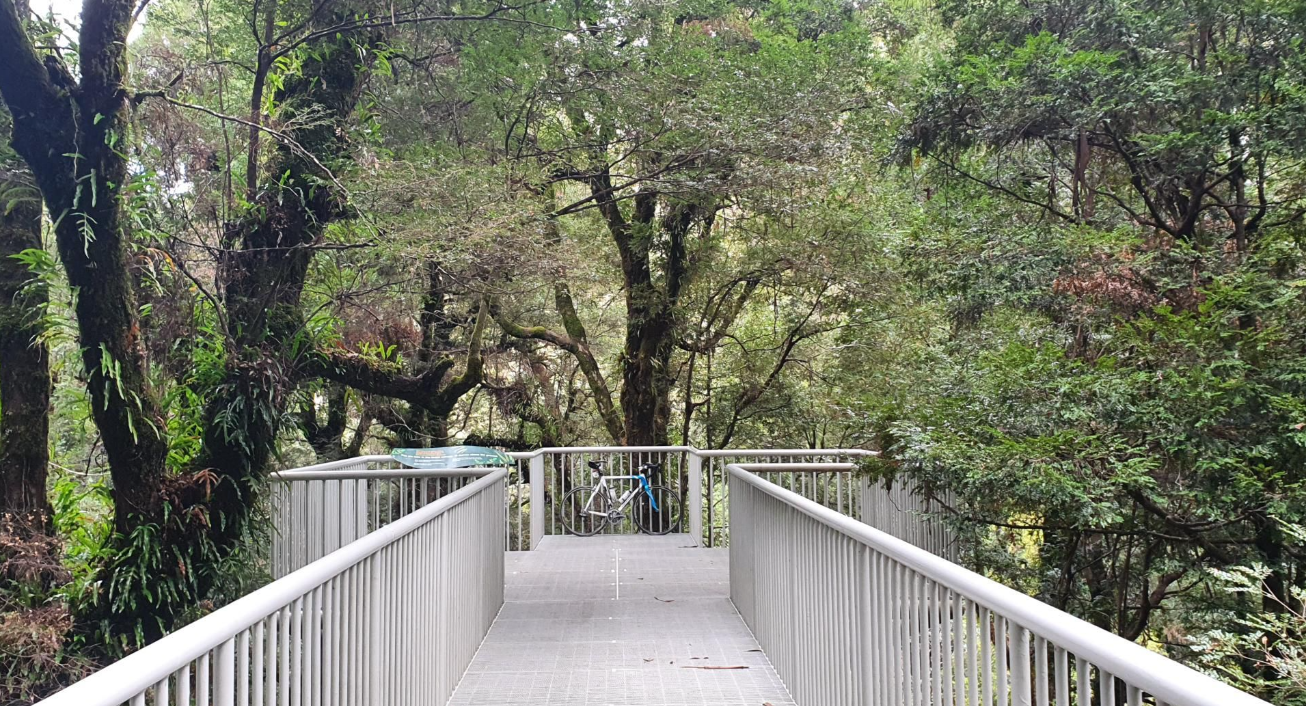

In [42]:
from PIL import Image

im = Image.open(img_name)
im

In [43]:
print(im.format, im.size, im.mode)

PNG (1306, 706) RGBA


In [44]:
width, height = im.size
width, height

(1306, 706)

In [45]:
print("The image is {} pixels wide and {} pixels tall".format(width, height))


The image is 1306 pixels wide and 706 pixels tall


In [46]:
# is width or height > 100?

if width > 100 or height > 100: 
    print("Width is greater than 200 pixels and/or height is greater than 100 pixels.  Recommend rescaling.")
    if width > height:
        print("The image is wider than it is tall.  Rescale such that width <= 200 pixels.")
    elif width < height:
        print("The image is taller than it is wide.  Rescale such that height <= 100 pixels.")
        

Width is greater than 200 pixels and/or height is greater than 100 pixels.  Recommend rescaling.
The image is wider than it is tall.  Rescale such that width <= 200 pixels.


In [47]:
# is width < 200 or height > 100?

if width > 200 or height > 100: 
    if width > height:
        width_reduce_factor = width / 200
        new_width = int(width / width_reduce_factor)
        new_height = int(height / width_reduce_factor)
    else:
        height_reduce_factor = height / 200
        new_height = int(height / height_reduce_factor)
        new_width = int(width / height_reduce_factor)
    
    print("Width rescaled to {}; height rescaled to {}".format(new_width, new_height))

#     print(new_width, new_height)

Width rescaled to 200; height rescaled to 108


In [48]:
im = im.resize((new_width, new_height))


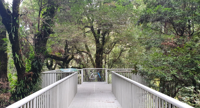

In [49]:
im

In [50]:
print(im.format, im.size, im.mode)

None (200, 108) RGBA


In [53]:
name = input("If you wish to have your name displayed under the picture you uploaded, please enter it here: ")


If you wish to have your name displayed under the picture you uploaded, please enter it here: Ben Pitt


Image width = 200
Image height = 108
xmax = 831.2325
0.6*xmax = 498.73949999999996
xy = [748.10925, 674.2199999999999]
xy[0]*0.6 = 448.86555


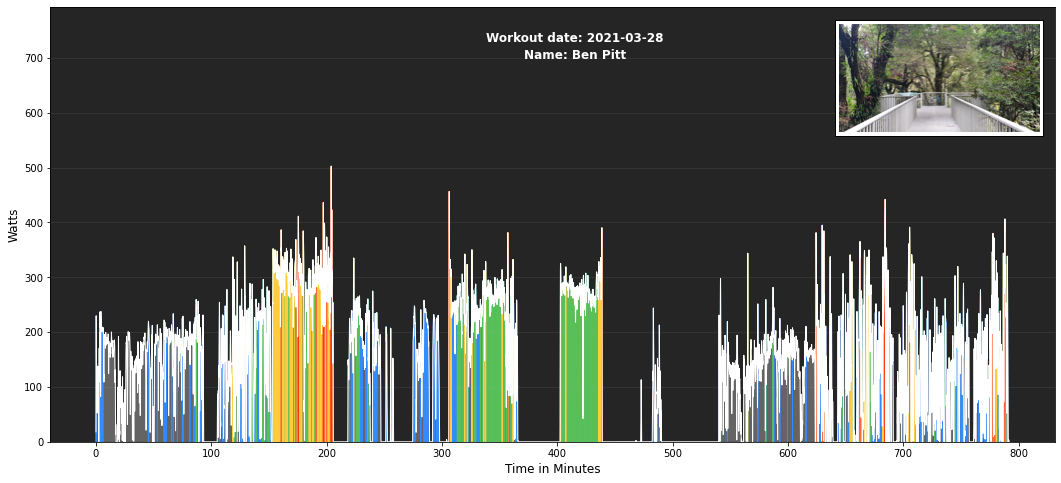

In [59]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox, AnchoredText, AnchoredOffsetbox)
from matplotlib.text import Annotation


if ftp != None:
    img, ax = plt.subplots(figsize=(18, 8))
    ax.set_facecolor(color='#252525')
    ax.set_xlabel("Time in Minutes", fontsize='large')
    ax.set_ylabel("Watts", fontsize='large')

    # This expands the top of the graph to 20% beyond max watts
    ax.set_ylim(top=max(watts)*1.20)

    # logic for color under the graph based on % of FTP (thanks to Jonas Häggqvist for this code)
    ax.grid(which='major', axis='y', alpha=0.1, linewidth=1)
    plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 0.00*ftp, color='#646464')
    plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 0.60*ftp, color='#328bff')
    plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 0.75*ftp, color='#59bf59')
    plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 0.90*ftp, color='#ffcc3f')
    plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 1.05*ftp, color='#ff663a')
    plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 1.18*ftp, color='#ff340c')

    # Setting the image and location (thanks to Phil Daws for the code that helped me get started)

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    xy = [xmax-(xmax*0.1), ymax-(ymax*0.15)]

    
    # Adding the workout date to the graph
    workout_date = Annotation(f'Workout date: {date_str}', xy=[xmax//2, ymax-(ymax*0.08)], 
                              ha='center', color='white', fontweight='bold', fontsize='large')
    ax.add_artist(workout_date)
    
    rider_name = Annotation(f'Name: {name}', xy=[xmax//2, ymax-(ymax*0.12)], ha='center', 
                            color='white', fontweight='bold', fontsize='large')
    ax.add_artist(rider_name)


    # Upload image, e.g., "example_image.png"
    if img_name != '':

        imagebox = OffsetImage(im, zoom=1)
        print("Image width = {}".format(new_width))
        print("Image height = {}".format(new_height))
        imagebox.image.axes = ax
        
        ab = AnnotationBbox(imagebox, xy, frameon=True, box_alignment = (0.6, 0.55))
        
        print(f'xmax = {xmax}')
        print(f'0.6*xmax = {0.6*xmax}')
        print(f'xy = {xy}')
        print(f'xy[0]*0.6 = {xy[0]*0.6}')
        
        ax.add_artist(ab)

        # Adding name under image
#         rider_name = Annotation(name, xy=[xmax-(xmax*0.12), ymax-(ymax*0.33)], xycoords='data', 
#                                 ha='center', color='white', fontweight='bold', fontsize='medium', 
#                                 fontstyle='italic')

#         ax.add_artist(rider_name)


    # Setting plot line color and thickness
    plt.plot(minutes, watts_smoothed, color='white', linewidth=1.0)

    plt.show()

else:
    print(f"\nThe graph cannot be drawn; no valid FTP was provided.")
    print(f"If you wish to try again, please have your FTP value ready and then reload this page.")
